# Data Mining Dylan

*Which places does Dylan sing about the most?*

- For named entity recognition code, see `find_cities.ipynb`
- For web scraping code, see `dylan_scraper.py`

In [1]:
import pandas as pd
import folium
import altair

In [2]:
# Load city data from file
city_df = pd.read_csv('data/city_counts.csv')
city_df['cnt'] = city_df['cnt'].astype(int)

## A bar chart

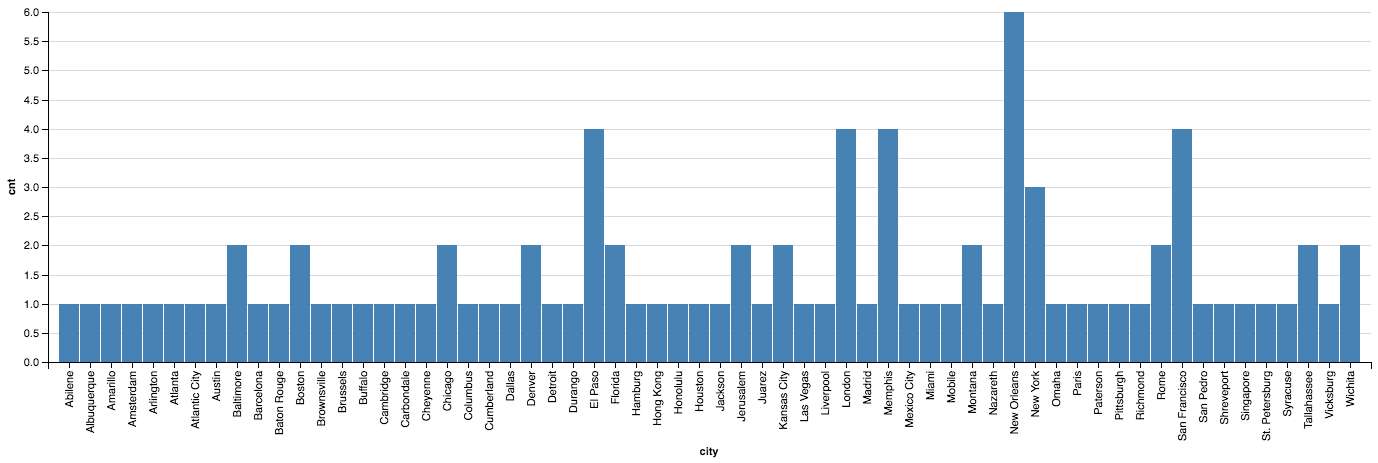

In [3]:
altair.Chart(city_df).mark_bar().encode(
    x='city',
    y='cnt'
)

## A Map

In [4]:
folium_map = folium.Map(tiles='stamenwatercolor')

popup_text = ("{}<br>"
              "Count: {}<br>"
              "Songs: {}<br>")

for idx, row in city_df.iterrows():
    folium.CircleMarker(
        location=(row.lat, row.lng),
        radius=row.cnt*1.3,
        color="purple",
        fill=True,
        popup=popup_text.format(
            row.city, row.cnt, 'songs..')
    ).add_to(folium_map)

folium_map